# k-mean for intrusion detection system
---
    In anomaly detection, the k-means clustering algorithm is used to detect novel intrusions by clustering the network connections’ data to collect the most of intrusions together in one or more clusters.


## NSL-KDD dataset
    NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set.

In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv("kdd_train.csv")

#We will be taking only two variables from the data – “dst_host_diff_srv_rate” and “dst_host_same_src_port_rate”.
X = data[["dst_host_diff_srv_rate", "dst_host_same_src_port_rate"]]

data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


## determine k using the elbow method
    The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K.
    In the following code the KElbowVisualizer fits the KMeans model for a range of K values from 2 to 15 on our dataset.

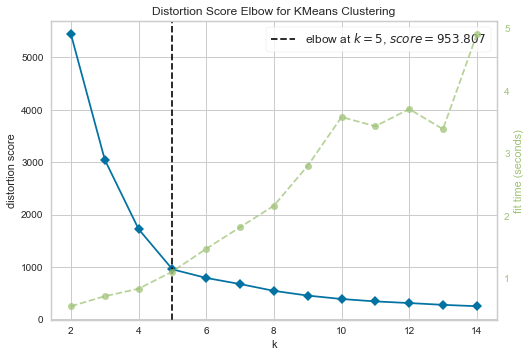

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Implement k-mean algorithm


Clustering...



<ipython-input-4-717a89ef3d10>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-4-717a89ef3d10>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-0.15010784434669736
-0.012759021218609185
0.019353216150201722
0.02022356476653423
0.01127842468436192
0.00979517229365319
0.010144048329690656
0.003955841013300654
0.007998362610043067
0.01079281067658883
0.012811955305291438
0.011899439599159463
0.012844459125165825
0.013192159824065124
0.011093579223649633
0.010129646054446731
0.010767834732446739
0.008233662749142633
0.008112118409122612
0.00558223315773871
0.004375593632869053
0.0007490450168011614
0.00014022670681640426
0.0


Run Time -> --- 1741.638177394867 seconds ---
Data Successfully Clustered


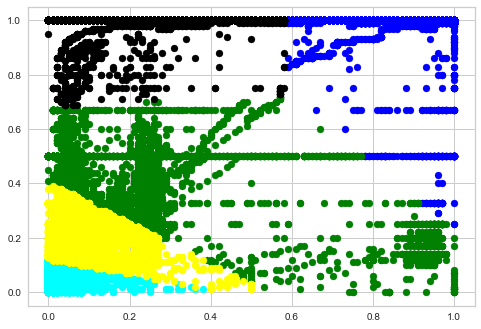

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import time

data=pd.read_csv("kdd_train.csv")
X = data[["same_srv_rate","dst_host_same_srv_rate"]]
# number of clustres
K=5
# Select random observation as centroids
Centroids = (X.sample(n=K))

diff = 1
j=0

print("\nClustering...\n")
start_time = time.time()

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["dst_host_same_srv_rate"]-row_d["dst_host_same_srv_rate"])**2
            d2=(row_c["same_srv_rate"]-row_d["same_srv_rate"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["same_srv_rate","dst_host_same_srv_rate"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['same_srv_rate'] - Centroids['same_srv_rate']).sum() + (Centroids_new['dst_host_same_srv_rate'] - Centroids['dst_host_same_srv_rate']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["same_srv_rate","dst_host_same_srv_rate"]]

print("\n\nRun Time ->","--- %s seconds ---" % (time.time() - start_time))
print("Data Successfully Clustered")

color=['blue','green','cyan', 'black', 'yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["dst_host_same_srv_rate"],data["same_srv_rate"],c=color[k])


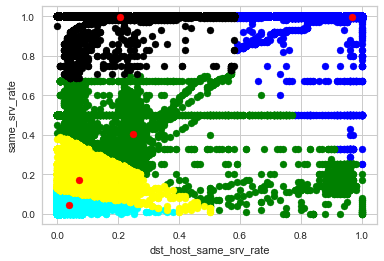

In [12]:
# print(Centroids)
# print(type(Centroids))

color=['blue','green','cyan','black', 'yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["dst_host_same_srv_rate"],data["same_srv_rate"],c=color[k])


plt.scatter(Centroids["dst_host_same_srv_rate"],Centroids["same_srv_rate"],c='red')
plt.xlabel('dst_host_same_srv_rate')
plt.ylabel('same_srv_rate')
plt.show()
# plt.scatter(X["dst_host_same_srv_rate"],X["same_srv_rate"],c='black')

       same_srv_rate  dst_host_same_srv_rate
0               1.00                    0.11
1               0.99                    0.80
2               1.00                    1.00
3               1.00                    0.01
4               1.00                    0.01
...              ...                     ...
22539           0.00                    0.00
22540           1.00                    1.00
22541           0.05                    0.10
22542           0.50                    0.00
22543           1.00                    1.00

[22544 rows x 2 columns]


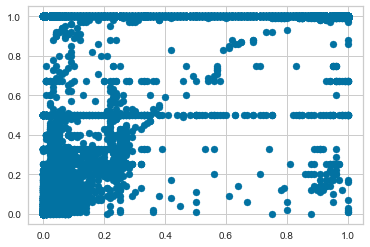

In [40]:
import matplotlib.pyplot as plt2
%matplotlib inline
test_data=pd.read_csv("kdd_test.csv")
X2 = test_data[["same_srv_rate","dst_host_same_srv_rate"]].copy()

plt2.scatter(test_data["dst_host_same_srv_rate"],test_data["same_srv_rate"], label='True Position')

print(X2)

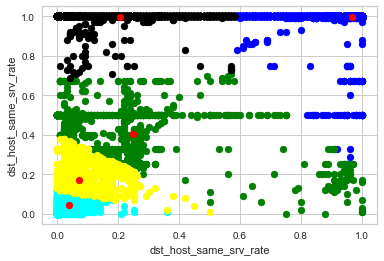

In [42]:
import numpy as np

from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import euclidean_distances
# euc_res=euclidean_distances(np.array(Centroids), np.array(X2))


'''Calculate distance between centroids and all the test points'''
XD2=X2.copy()
i=1
for index1,row_c in Centroids.iterrows():
    ED2=[]
    for index2,row_d in XD2.iterrows():
        d12=(row_c["dst_host_same_srv_rate"]-row_d["dst_host_same_srv_rate"])**2
        d22=(row_c["same_srv_rate"]-row_d["same_srv_rate"])**2
        d2=np.sqrt(d12+d22)
        ED2.append(d2)
    X2[i]=ED2.copy()
    i=i+1

'''Find the shortest distance and attribute attribute the points to it'''
C2=[]
for index,row in X2.iterrows():
    min_dist2=row[1]
    pos2=1
    for i in range(K):
        if row[i+1] < min_dist2:
            min_dist2 = row[i+1]
            pos2=i+1
    C2.append(pos2) 
X2["Cluster"]=C2
X2["labels"] = test_data["labels"]

test_data["Cluster"]= C2

color=['blue','green','cyan','black', 'yellow']
for k in range(K):
    test_d=X2[X2["Cluster"]==k+1]
    plt2.scatter(test_d["dst_host_same_srv_rate"],test_d["same_srv_rate"],c=color[k])
    
plt2.scatter(Centroids["dst_host_same_srv_rate"],Centroids["same_srv_rate"],c='red')
plt2.xlabel('dst_host_same_srv_rate')
plt2.ylabel('dst_host_same_srv_rate')
plt2.show()


In [43]:
test_data.head(15)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,Cluster
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,0.11,0.02,0.01,0.04,0.00,0.0,0.87,0.0,normal,4
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,0.80,0.02,0.01,0.00,0.00,0.0,0.00,0.0,normal,1
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.0,normal,1
3,1979,udp,other,SF,145,105,0,0,0,0,...,0.01,0.84,1.00,0.00,0.00,0.0,0.00,0.0,normal,4
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,0.01,0.68,1.00,0.00,0.00,0.0,1.00,1.0,portsweep,4
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.07,0.00,0.00,1.00,1.0,0.00,0.0,neptune,3
6,0,tcp,http,SF,294,5499,0,0,0,0,...,1.00,0.00,0.50,0.04,0.00,0.0,0.00,0.0,normal,1
7,0,tcp,http,S0,0,0,0,0,0,0,...,0.17,0.03,0.01,0.00,1.00,1.0,0.00,0.0,neptune,2
8,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf,1
9,0,udp,private,SF,1,0,0,0,0,0,...,0.13,0.45,0.66,0.00,0.03,0.0,0.31,0.0,satan,4


In [61]:
predict_labels = []
i=0
for index, row in X2.iterrows():
    if(X2["Cluster"][i]== 4 or X2["Cluster"][i]== 1):
        predict_labels.append("normal")
    else:
        predict_labels.append("attack")
    i+=1
    
# print(X2["Cluster"][0])

X2["predict_lables"] = predict_labels
X2.head(50)

,same_srv_rate,dst_host_same_srv_rate,1,2,3,4,5,Cluster,labels,predict_lables
0,1.00,0.11,0.857237,0.611534,0.957994,0.094817,0.831568,4,normal,normal
1,0.99,0.80,0.167420,0.804572,1.214740,0.595289,1.096736,1,normal,normal
2,1.00,1.00,0.032835,0.959067,1.356392,0.795264,1.245127,1,normal,normal
3,1.00,0.01,0.957237,0.641595,0.955590,0.194780,0.833070,4,normal,normal
4,1.00,0.01,0.957237,0.641595,0.955590,0.194780,0.833070,4,portsweep,normal
5,0.04,0.04,1.333142,0.419691,0.005656,0.970381,0.133302,3,neptune,attack
6,1.00,1.00,0.032835,0.959067,1.356392,0.795264,1.245127,1,normal,normal
7,0.57,0.17,0.904793,0.183271,0.541788,0.427708,0.412411,2,neptune,attack
8,1.00,1.00,0.032835,0.959067,1.356392,0.795264,1.245127,1,smurf,normal
9,1.00,0.13,0.837237,0.607321,0.959725,0.074836,0.832709,4,satan,normal
